<a href="https://colab.research.google.com/github/avawaxenberg/FDSfE_AWaxenberg/blob/main/INCLASS/linearregression_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv", 
                   header=None, names=["population", "wspeed"])

In [2]:
df

,population,wspeed
0,2520.0,2.28
1,370.0,2.79
2,5650.0,3.37
3,14100.0,3.76
4,23300.0,3.31
5,52600.0,4.91
6,73300.0,4.40
7,77100.0,3.90
8,145000.0,4.40
9,320000.0,4.49


In [3]:
import numpy as np
df["population"] = np.log10(df.population)

In [4]:
import pylab as plt

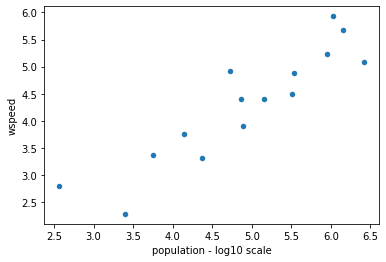

In [5]:
df.plot("population", "wspeed", kind="scatter")
plt.xlabel("population - log10 scale");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


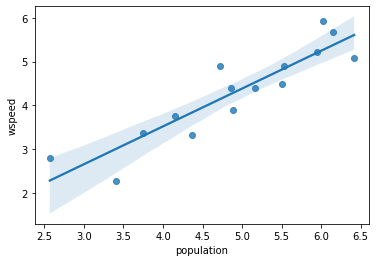

In [6]:
import seaborn as sns
sns.regplot(df['population'], df['wspeed'])
plt.show()

In [11]:
# objective function: sum squared errors (SSE)
def sumsqerror(y, yp):
  return ((y - yp) ** 2).sum()

In [38]:
sumsqerror(df["wspeed"], df["wspeed"])

0.0

In [41]:
minnow = 1e7
for s in np.arange(0, 3, 0.01):
  for i in np.arange(0, 2.5, 0.01):
    prediction = df['population'] * s + i 
    sse = sumsqerror(df.wspeed, prediction)
    if sse < minnow:
      minnow = sse
      slope_manual, intercept_manual = s, i

slope_manual, intercept_manual

(0.87, 0.03)

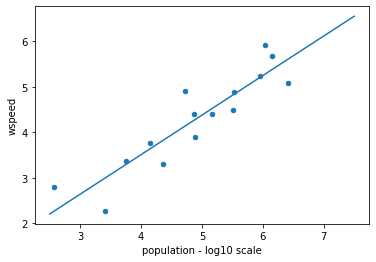

In [45]:
df.plot("population", "wspeed", kind="scatter")
plt.xlabel("population - log10 scale");
x = np.arange(2.5, 7.6, 0.5)
prediction = x * slope_manual + intercept_manual
plt.plot(x, prediction)

In [10]:
...

Ellipsis

In [37]:
np.polyfit(

SyntaxError: ignored

In [16]:
...

Ellipsis

KeyError: ignored

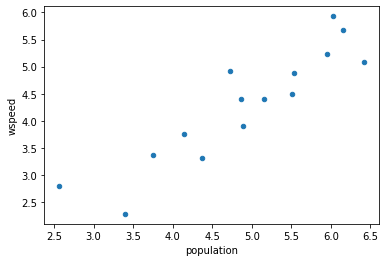

In [17]:
ax = df.plot("population", "wspeed", kind="scatter")
df.plot("population", "prediction", kind="line", ax=ax)
ax.plot(df.population, df['population'] * slope_manual + inrercept_manual );

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(...

SyntaxError: ignored

In [19]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = df['population']
y = df['wspeed']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,population
0,1.0,3.401401
1,1.0,2.568202
2,1.0,3.752048
3,1.0,4.149219
4,1.0,4.367356


In [22]:
model = sm.OLS(...
# Show the summary
results.summary()

SyntaxError: ignored

In [21]:
#alternative: statsmodel formula that could be useful if you wanted to create more complicated models
import statsmodels.formula.api as smf

In [23]:
mod = smf.ols(formula=...
res.summary();

SyntaxError: ignored

In [24]:
res.predict()

NameError: ignored

In [25]:
# fit a quadratic model a*pop^2 + b*pop + const
mod = smf.ols(formula= ...

res2.summary()

SyntaxError: ignored

NameError: ignored

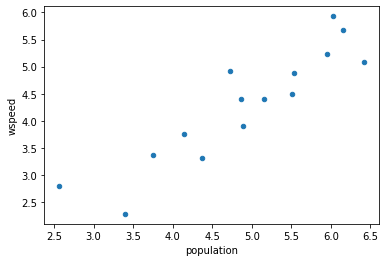

In [26]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df))
ax.plot(df.population, res2.predict(df))
plt.xlabel('x')
plt.ylabel('y');

In [27]:
res2.compare_lr_test(res)

NameError: ignored

In [28]:
print('likelihood ration test - set alpha to alpha=0.05\n\n' ,  
      'the NH is that the more complex model is better than the simpler one\n\n' ,
'''the likelihood ration statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (={2:.0f} here)
this corresponds not being able to reject the NH at alpha 0.05'''.format(*res2.compare_lr_test(res)))

NameError: ignored

In [29]:
res.params

NameError: ignored

In [30]:
res.conf_int()

NameError: ignored

In [31]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(res, alpha=0.05)
data.shape

NameError: ignored

In [32]:
(15, 12)
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,4:6].T
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df))
ax.fill_between(df.population.values, predict_ci_low, predict_ci_upp, alpha=0.5)

NameError: ignored

In [33]:
sm.graphics.influence_plot(res);

NameError: ignored

In [34]:
sm.graphics.influence_plot(res2);

NameError: ignored